In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('cleaned_train.csv')  # Loading cleaned train data
test = pd.read_csv('cleaned_test.csv')    # Loading cleaned test data

Dropping rows with null value (if any)

In [ ]:
train.dropna(inplace=True)

In [ ]:
test.dropna(inplace = True)

Train-Validation Split

In [ ]:
import pandas as pd 
 
train_size = int(0.8 * len(train))


train_set = train.iloc[:train_size , : ]
val_set = train.iloc[train_size: , : ]

Defining X_train , X_val , y_train and y_val

In [ ]:
X_train = train_set.drop(['Survived'],axis = 1)
X_val = val_set.drop(["Survived"],axis = 1)
y_train = train_set["Survived"]
y_val = val_set["Survived"]

## Code for implementation of NaiveBayes algorithm

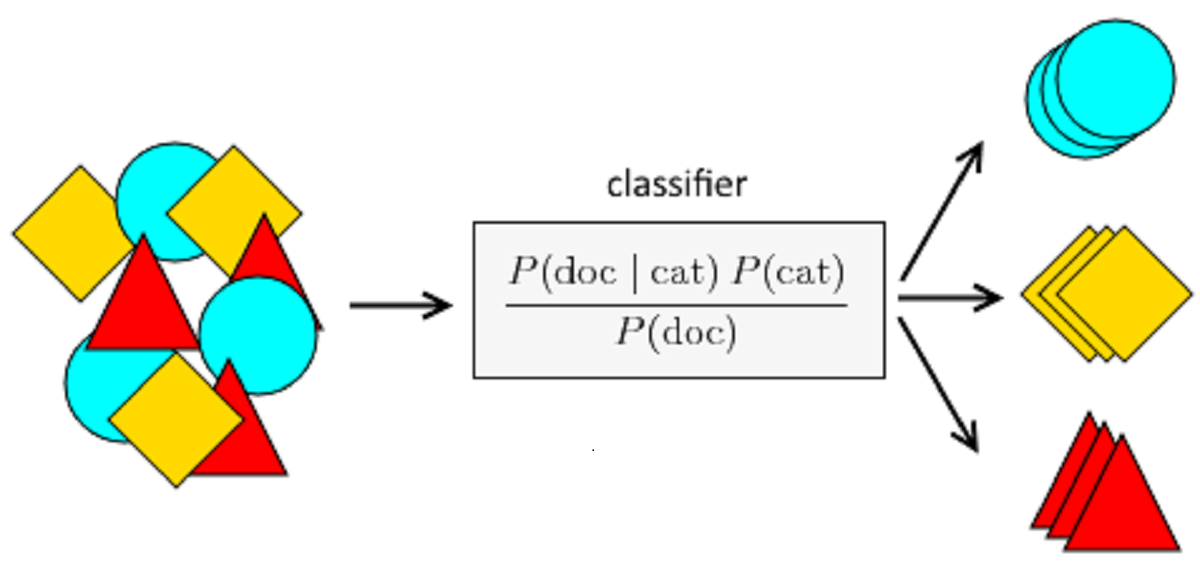

In [ ]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    

In [ ]:
nbc = NaiveBayesClassifier()
nbc.fit(X_train, y_train) 

In [ ]:
y_preds = nbc.predict(X_val)

Function to calculate accuracy

In [ ]:
def accuracy(y_true,y_pred,normalize=True):
    accuracy=[]
    for i in range(len(y_pred)):
        if y_pred[i]==y_true[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    if normalize==True:
        return np.mean(accuracy)
    if normalize==False:
        return sum(accuracy)

In [ ]:
print("Accuracy : {} %".format(round(accuracy(np.array(y_val) , y_preds )*100,2)))

Accuracy : 82.02 %


In [ ]:
nbc.accuracy(y_val , y_preds)

0.8202247191011236